# Economic predictors from (Hull et al., 2017)
In this notebook we download the data and calculate the 15 economic predictors from (Hull et al., 2017). All raw data is gather through FRED (Federal Reserve Board) API. The full name of citation is listed below. 

Hull, B., Qiao, X., & Bakosova, P. (2017). Return Predictability and Market-Timing: A One-Month Model (SSRN Scholarly Paper ID 3050254). Social Science Research Network. https://doi.org/10.2139/ssrn.3050254


In [1]:
from fredapi import Fred
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns

fred = Fred(api_key='631315bacbfa8bb2b05f554ff915e38e')
start_time = '2003-08-01'
end_time = '2020-01-01'

fig_path = '/Users/cheng/Google Drive/PhD/Research/Tactical asset allocation/picture/'

## Data gathering

### Change in Inflation (CI)
The change in inflation is captured by the percentage change CPI (Consumer Price Index). Substracting risk-free rate, it reflect the net changes. Here, the risk-free rate,$R_{f,t}$ refer to the three-month Treasury bill rate. All data are monthly data.

\begin{equation}
\text{inflation change} = \frac{CPI_{t} - CPI_{t-1}}{CPI_{t-1}} - R_{f,t}
\end{equation}

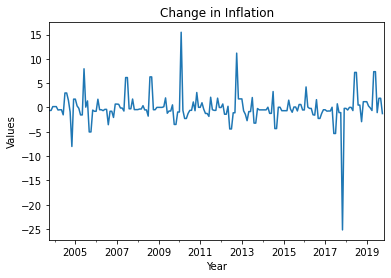

In [2]:
cpi = fred.get_series('CPALTT01USM657N', observation_start=start_time, observation_end=end_time).dropna()
rf = fred.get_series('DTB3', observation_start=start_time, observation_end=end_time).dropna() / 100 # convert to percentage
CI = (cpi.pct_change() - rf).dropna()
CI = CI.replace([np.inf, -np.inf], 0) # missing value in CPI is indicated with 0.
CI = CI.resample('M').bfill()
date = [date.replace(day=1) for date in CI.index]
CI.index = date

CI.plot()
plt.title('Change in Inflation')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "CI.png")

### Industrial Production (IP)

Industrial production is captured by the industrial production index. The monthly change of the industrial production index can be used as an predictor.

\begin{equation}
\text{IP} = \frac{IP_{t} - IP_{t-1}}{IP_{t-1}}
\end{equation}

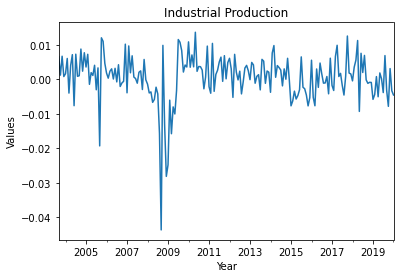

In [3]:
ip_index = fred.get_series('INDPRO', observation_start=start_time, observation_end=end_time).dropna()
IP = ip_index.pct_change().dropna()
date = [date.replace(day=1) for date in IP.index]
IP.index = date

IP.plot()
plt.title('Industrial Production')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "IP.png")

### Credit Risk Premium (CRP)
The credit risk premium is calculated as the difference between BAA and AAA corporate bond yield.
\begin{equation}
\text{CRP} = BAA - AAA
\end{equation}

Both BAA and AAA are reported in percentage and updated monthly.

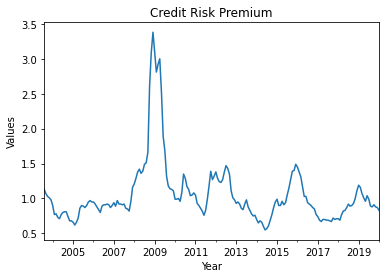

In [4]:
baa = fred.get_series('BAA', observation_start=start_time, observation_end=end_time).dropna()
aaa = fred.get_series('AAA', observation_start=start_time, observation_end=end_time).dropna()
CRP = baa - aaa
date = [date.replace(day=1) for date in CRP.index]
CRP.index = date

CRP.plot()
plt.title('Credit Risk Premium')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "CRP.png")

### Slope of the Interest Rate Term Structure (STS)
The term spread is the difference of yield between 10-year and 3-month Treasury bill.
\begin{equation}
\text{STS} = TB_{10} - TB_3
\end{equation}
This spread can be obtained directly from FRED. It's known as 10-Year Treasury Constant Maturity Minus 3-Month Treasury Constant Maturity.
This data are reported in percentage and updated monthly.



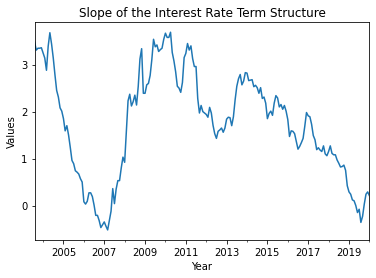

In [5]:
STS = fred.get_series('T10Y3MM', observation_start=start_time, observation_end=end_time).dropna()
date = [date.replace(day=1) for date in STS.index]
STS.index = date

STS.plot()
plt.title('Slope of the Interest Rate Term Structure')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "STS.png")

### Commodity Price (CP)
CP is captured by the S&P GSCI index. This index reflect the oil price movement.
The monthly data is obtained from Bloomberg. 

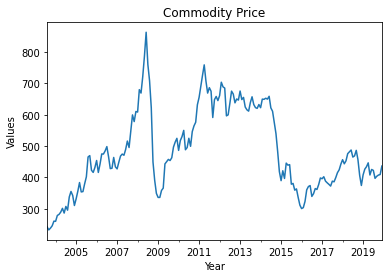

In [24]:
CP = pd.read_csv('/Users/cheng/Google Drive/PhD/Research/Tactical asset allocation/data/SPGSCI.csv', index_col = 0, parse_dates=True)
CP = CP.loc[start_time:end_time]['SPGSCI']
date = [date.replace(day=1) for date in CP.index]
CP.index = date

CP.plot()
plt.title('Commodity Price')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "CP.png")

### Housing Starts (HS)

The changes in housing starts index can be one predictor. This index can be obtained from FRED. It's known as New Privately-Owned Housing Units Started: Total Units. It's updated monthly.


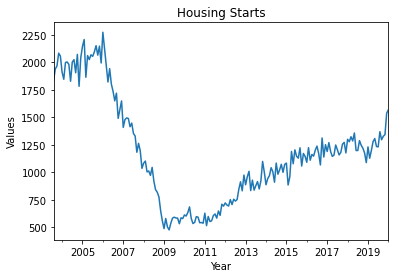

In [7]:
HS = fred.get_series('HOUST', observation_start=start_time, observation_end=end_time).dropna()
date = [date.replace(day=1) for date in HS.index]
HS.index = date

HS.plot()
plt.title('Housing Starts')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "HS.png")

### Exchange Rate (EVUSD)
Monthly change in the U.S. Dollar Index (DXY) from Bloomberg.

Higher dollar exchange predicts lower future market excess returns (Bahmani-Oskooee and Sohrabian, 1992).

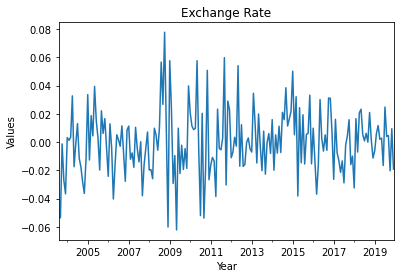

In [21]:
DXY = pd.read_csv('/Users/cheng/Google Drive/PhD/Research/Tactical asset allocation/data/DXY.csv', index_col = 0, parse_dates=True)
DXY = DXY.loc[start_time:end_time]['DXY']
date = [date.replace(day=1) for date in DXY.index]
DXY.index = date
EVUSD = DXY.pct_change()

EVUSD.plot()
plt.title('Exchange Rate')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "EVUSD.png")

### Baltic Dry Index (BD)
Monthly percent change in the Baltic Dry Index from Bloomberg.

We use BD to track global shipping as one measurement of macroeconomic conditions. 

BD is a leading indicator of economic cycles, and is positively correlated with future excess returns.

\begin{equation}
\text{BD Change} = \frac{BD_{t} - BD_{t-1}}{BD_{t-1}} 
\end{equation}

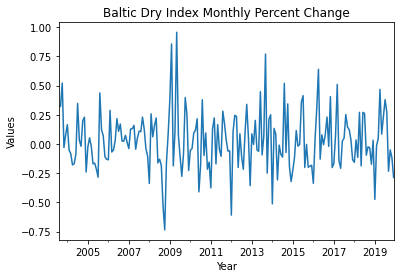

In [20]:
BD = pd.read_csv('/Users/cheng/Google Drive/PhD/Research/Tactical asset allocation/data/BD.csv', index_col = 0, parse_dates=True)
BD = BD.loc[start_time:end_time]['BD']
date = [date.replace(day=1) for date in BD.index]
BD.index = date
BDC = BD.pct_change()

BDC.plot()
plt.title('Baltic Dry Index Monthly Percent Change')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "BDC.png")

### FRB Loan Officer Survey (LOAN)
In (Hull et al., 2017), it try to capture the changes in lending conditions within U.S. banks. We use Net Percentage of Domestic Banks Tightening Standards for Commercial and Industrial Loans to Large and Middle-Market Firms instead.


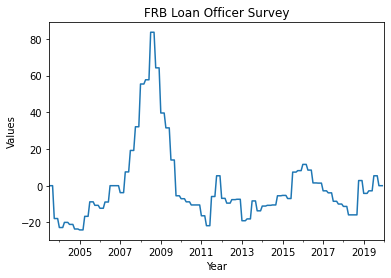

In [10]:
LOAN_raw = fred.get_series('DRTSCILM', observation_start=start_time, observation_end=end_time)
LOAN = LOAN_raw.resample('M').bfill()
date = [date.replace(day=1) for date in LOAN.index]
LOAN.index = date

LOAN.plot()
plt.title('FRB Loan Officer Survey')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "LOAN.png")

### Delinquencies (DL)
In (Hull et al., 2017), they calculate the annual change in delinquencies. We use the change of Delinquency Rate on All Loans from All Commercial Banks on FRED to capture this change.

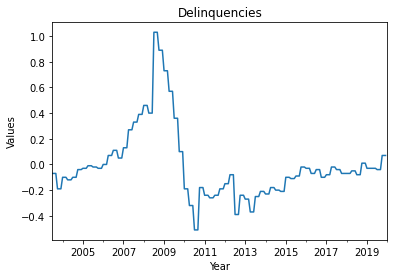

In [11]:
DL_raw = fred.get_series('DRALACBS', observation_start=start_time, observation_end=end_time).dropna().diff()
DL = DL_raw.resample('M').bfill()
date = [date.replace(day=1) for date in DL.index]
DL.index = date

DL.plot()
plt.title('Delinquencies')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "DL.png")

### New Orders New Shipments (NONS)
In (Hull et al., 2017), they use the value of new orders and new shipment as predictors. Furthermore, they exclude the value of defense and aircraft to emphasis on capital goods. We use Manufacturers' New Orders: Nondefense Capital Goods Excluding Aircraft to represent this feature. The data is obtained from FRED and updated monthly.


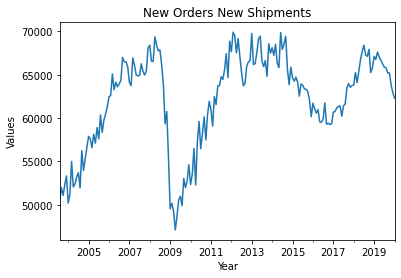

In [12]:
NONS = fred.get_series('NEWORDER', observation_start=start_time, observation_end=end_time).dropna()
date = [date.replace(day=1) for date in NONS.index]
NONS.index = date

NONS.plot()
plt.title('New Orders New Shipments')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "NONS.png")

### National Association of Purchasing Managers (NAPM)

In (Hull et al., 2017), they calculate NAPM as the difference between manufacturing survey new orders and the prices paid indexes. We capture this difference by the difference between Manufacturers' New Orders: Total Manufacturing (AMTMNO) and Index of Prices Paid by Farmers for Commodities Used in Both Living and Production for United State (M04127USM319NNBR).

\begin{equation}
\text{NAPM} = \text{Manufacturing New Orders} - \text{Prices Paid Index}
\end{equation}


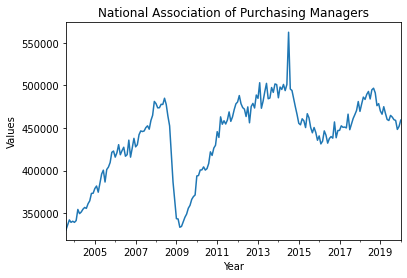

In [13]:
new_order = fred.get_series('AMTMNO', observation_start=start_time, observation_end=end_time).dropna()
price_index = fred.get_series('M04127USM319NNBR', observation_start=start_time, observation_end=end_time).dropna()
NAPM = new_order
date = [date.replace(day=1) for date in NAPM.index]
NAPM.index = date

NAPM.plot()
plt.title('National Association of Purchasing Managers')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "NAPM.png")

### Change in Unemployment Rate (UR)

\begin{equation}
\text{UR} = \frac{\text{unemployment rate}_t - \text{unemployment rate}_{t-1}}{\text{unemployment rate}_{t-1}}
\end{equation}

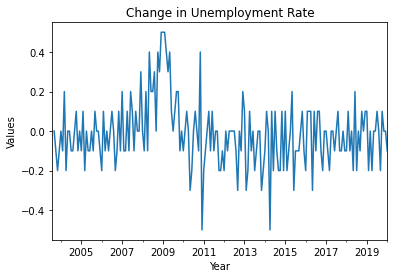

In [14]:
unemploymentr_ate = fred.get_series('UNRATE', observation_start=start_time, observation_end=end_time).dropna()
UR = unemploymentr_ate.diff()
date = [date.replace(day=1) for date in UR.index]
UR.index = date

UR.plot()
plt.title('Change in Unemployment Rate')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "UR.png")

### Momentum (MOM)
Monthly change in S\&P 500 return

\begin{equation}
\text{MOM} = SP_t - SP_{t-1}
\end{equation}


[*********************100%***********************]  1 of 1 completed


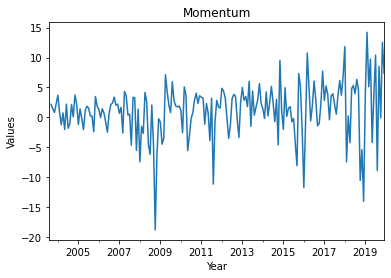

In [15]:
#sp = fred.get_series('SP500', observation_start=start_time, observation_end=end_time).dropna()
sp = yf.download('SPY', start=start_time, end=end_time)['Adj Close']
MOM = sp.resample('M').mean()
MOM = MOM.diff()
date = [date.replace(day=1) for date in MOM.index]
MOM.index = date

MOM.plot()
plt.title('Momentum')
plt.xlabel('Year')
plt.ylabel('Values')
plt.savefig(fig_path + "MOM.png")

## Data analyse
Summary statistics and group plots

### 5-number summary

In [25]:
predictors_list = [CI, IP, CRP, STS, CP, HS, LOAN, DL, NONS, NAPM, UR, MOM, BDC, EVUSD]
predictors_name_list = ['CI', 'IP', 'CRP', 'STS', 'CP', 'HS', 'LOAN', 'DL', 'NONS', 'NAPM', 'UR', 'MOM', 'BDC', 'EVUSD']
predictors_dict = {name: x for name, x in zip(predictors_name_list, predictors_list)}
predictors_stats_dict = {name: x.describe() for name, x in zip(predictors_name_list, predictors_list)}
predictors_stats_df = pd.DataFrame(predictors_stats_dict)
predictors_df = pd.DataFrame(predictors_dict).dropna()

In [26]:
stats_list = ['count', 'mean', 'std', 'min', 'max']
predictors_stats_df.loc[stats_list].T.to_latex('/Users/cheng/Google Drive/PhD/Research/Tactical asset allocation/table/predictors_stats_12_12.tex', float_format='%.3f')

In [27]:
predictors_stats_df.loc[stats_list].T

,count,mean,std,min,max
CI,193.0,-0.127973,3.194768,-25.178579,15.476075
IP,197.0,0.000577,0.006868,-0.043683,0.013696
CRP,198.0,1.052879,0.454573,0.550000,3.380000
STS,198.0,1.766869,1.124556,-0.520000,3.690000
CP,197.0,483.697629,131.305992,232.634400,862.809000
HS,198.0,1183.065657,473.507541,478.000000,2273.000000
LOAN,198.0,-0.548485,21.125241,-24.100000,83.600000
DL,198.0,-0.010909,0.279272,-0.510000,1.030000
NONS,198.0,62123.040404,5471.444224,47096.000000,69902.000000
NAPM,198.0,438757.666667,47251.893805,330322.000000,562533.000000


In [20]:
predictors_df.to_csv('../../data/econ_predictors_2.csv')


### Visualization

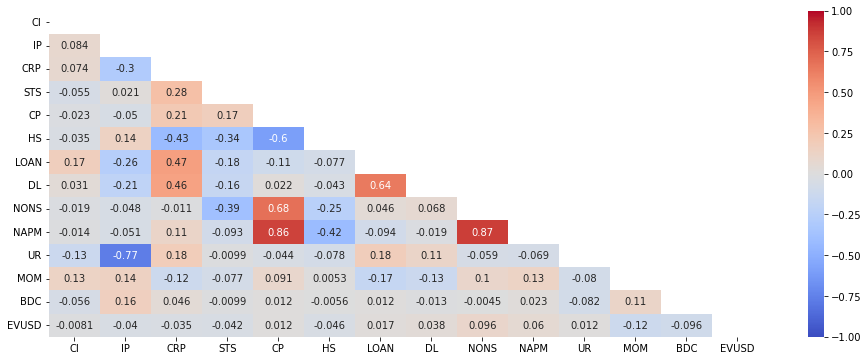

In [68]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(predictors_df.corr(), dtype=bool))
heatmap = sns.heatmap(predictors_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
#heatmap.set_title('Ecnomic Predictors Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [67]:
heatmap.figure.savefig('/Users/cheng/Google Drive/PhD/Research/Tactical asset allocation/picture/predictor_cor_heat.png')

In [ ]:
predictors_stats_df.T.to_latex('/Users/cheng/Google Drive/PhD/Research/Tactical asset allocation/table/predictors_stats.tex', float_format = "%.3f")

In [ ]:
predictors_df.corr().to_latex('/Users/cheng/Google Drive/PhD/Research/Tactical asset allocation/table/predictors_corr.tex', float_format = "%.3f")

In [ ]:
predictors_df.to_csv('/Users/cheng/Google Drive/PhD/Research/Tactical asset allocation/data/econ_predictors.csv')

In [ ]:
predictors_names_dict = {'CI' : 'Change in Inflation', 
                         'IP': 'Industrial Production', 
                         'CRP': 'Credit Risk Premium',
                         'STS': 'Slope of the Interest Rate Term Structure',
                         'CP': 'Commodity Price',
                         'HS': 'Housing Starts',
                         'LOAN': 'FRB Loan Officer Survey',
                         'DL': 'Delinquencies',
                         'NONS': 'New Orders New Shipments',
                         'NAPM': 'National Association of Purchasing Managers',
                         'UR': 'Change in Unemployment Rate',
                         'MOM': 'Momentum'
                         }

predictors_names_df = pd.DataFrame(predictors_names_dict, index = ['descriptions'])

In [ ]:
predictors_names_df.T.to_latex('/Users/cheng/Google Drive/PhD/Research/Tactical asset allocation/table/predictors.tex')